In [ ]:
# generar la matriz de coeficientes A y el vector de terminos independientes 
from decimal import *
import random as random
import numpy as np
import secrets


def vector_random(longitud):
  vector = []
  #vector = [ secrets.randbelow(1) for i in range(0, longitud)  ]
  #vector = [  decimal.Decimal(random.randrange(0, 10)/100) for i in range(0, longitud)  ]
  vector = [ random.random() for i in range(0, longitud)  ]
  #print('vector: ', vector)
  return vector


def matriz_personalizada(filas, columnas):
  matriz = []
  for i in range(0, filas):
    vect_rand = vector_random(columnas)
    matriz.append(vect_rand)
    print(vect_rand)
  #print('matriz dentro de función: ', matriz)
  return matriz


n=3
#A = np.random.rand(n, n)

b = np.random.rand(n)

#alpha = 3 * n

#print('matriz: ',A)
#print('Vector: ', b)


A = matriz_personalizada(3,3)

print('Mi matriz:', A)


[0.6361069165880991, 0.06492866590686375, 0.2399927668560342]
[0.10874523193658914, 0.19107774739613603, 0.007312598552075333]
[0.26221041509951304, 0.19528101523716124, 0.7642795233574006]
Mi matriz: [[0.6361069165880991, 0.06492866590686375, 0.2399927668560342], [0.10874523193658914, 0.19107774739613603, 0.007312598552075333], [0.26221041509951304, 0.19528101523716124, 0.7642795233574006]]


# Resultado adecuado:
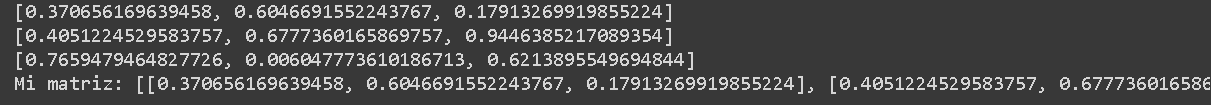



### valores para copiar: 

#### Matriz: 

[0.370656169639458, 0.6046691552243767, 0.17913269919855224]
[0.4051224529583757, 0.6777360165869757, 0.9446385217089354]
[0.7659479464827726, 0.006047773610186713, 0.6213895549694844]


#### Vector b :

vector b:  [0.02485405 0.18038108 0.17793844]


In [ ]:
# encontrar el determinante
from decimal import *


def mi_Determinante(mi_mat):
  longitud_mat = len(mi_mat)
  #pivot_conteo = len(mi_mat) - 1    # restado --
  #conteo_cero = 0
  diag_prin_prod = 0
  diag_sec_prod  = 0
  for i in range(0, longitud_mat, 1):
    #diag_prin_prod += Decimal( Decimal( Decimal(Decimal(mi_mat[i][0]) ) * Decimal(mi_mat[(i+1)%longitud_mat][1]) ) * Decimal(mi_mat[(i+2)%longitud_mat][2]) )
    #diag_sec_prod += Decimal( Decimal( Decimal(Decimal(mi_mat[i][2])) * Decimal( mi_mat[(i+1)%longitud_mat][1]) ) * Decimal( mi_mat[(i+2)%longitud_mat][0])  )
    diag_prin_prod += mi_mat[i][0]  * mi_mat[(i+1)%longitud_mat][1]  * mi_mat[(i+2)%longitud_mat][2]
    diag_sec_prod +=  mi_mat[i][2] *  mi_mat[(i+1)%longitud_mat][1] *  mi_mat[(i+2)%longitud_mat][0]
  resultado = diag_prin_prod - diag_sec_prod
  return resultado


determinante_np = np.linalg.det(A)
print('determinante_np: ',determinante_np)
determinante = mi_Determinante(A)
print('determinanteMio: ',determinante)



determinante_np:  0.8588944354922574
determinanteMio:  0.8588944354922574


# Resultado optimo
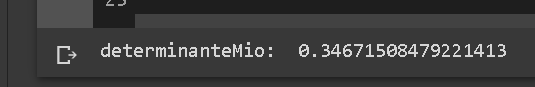

### If determinante == 0 := no tiene solución el SEL

## Comprobación de diagonal dominante

In [ ]:

long_vector_b = len(b)
cuenta_dominantes = 0


for i in range(0, n):
  fila_vect = A[i]
  Aii = A[i][i]
  suma_fila_ = 0
  for j in range(n):
    if i != j:
      suma_fila_ =  suma_fila_ + abs( fila_vect[j] )
    if Aii > suma_fila_ :
      cuenta_dominantes += 1
    else:
      break # salirse y no continuar con la comprobacion de DD

DD =False
if cuenta_dominantes == long_vector_b :
  print('Matriz es DD y el metodo iterativo convergerá ... ')
  DD = True
else: 
  print('Matriz no es DD ... no convergerá .')


Matriz no es DD ... no convergerá .



# Pr. Metodo Jacobi


In [ ]:
print ('vector b: ', b)

# valores iniciales
tol_err = 0.000001      #valor de la tolerancia del error
error = 100000          #valor inicial de la norma        De error = 3 . error = 16
max_iteraciones = 100          # maximo de iteraciones
longi_A = len(A)        # longitud de A
x = np.zeros(longi_A)   # vector inicial
x1 = np.zeros(longi_A)  # vector auxiliar
conta_iteraciones = 0   # contador de iteraciones
Num_iter = []              #
Error = []              #g 

numerador_jac = 0

while conta_iteraciones < max_iteraciones and error> tol_err:
  for i in range(longi_A):            ## !! recorrer filas
    bi = b[i]
    for j in range(longi_A):          ## !! recorrer columnas
      if i != j :
        numerador_jac = bi - A[i][j] * x[j]
    x[i]=  numerador_jac / A[i][i]

  print('iteracion # : ', conta_iteraciones)
  error = np.linalg.norm(x-x1)
  print('error: ', error)
  x1 = np.copy(x)
  print('x1: ', x1)

  conta_iteraciones +=1
  Num_iter.append(conta_iteraciones)
  Error.append(error)
  if error<=tol_err:
    print('error<=tol_err', ', error: ', error, ', tol_error: ', tol_err)



vector b:  [0.30558924 0.44583088 0.49526538]
iteracion # :  0
error:  2.3827509907592814
x1:  [0.48040546 2.33324335 0.05184916]
iteracion # :  1
error:  0.019668759510898914
x1:  [0.46084362 2.33125907 0.05235616]
iteracion # :  2
error:  0.00019232971576513643
x1:  [0.46065234 2.33123967 0.05236112]
iteracion # :  3
error:  1.8806839112595241e-06
x1:  [0.46065047 2.33123948 0.05236117]
iteracion # :  4
error:  1.8390148219860605e-08
x1:  [0.46065045 2.33123948 0.05236117]
error<=tol_err , error:  1.8390148219860605e-08 , tol_error:  1e-06


# Solución adecuada
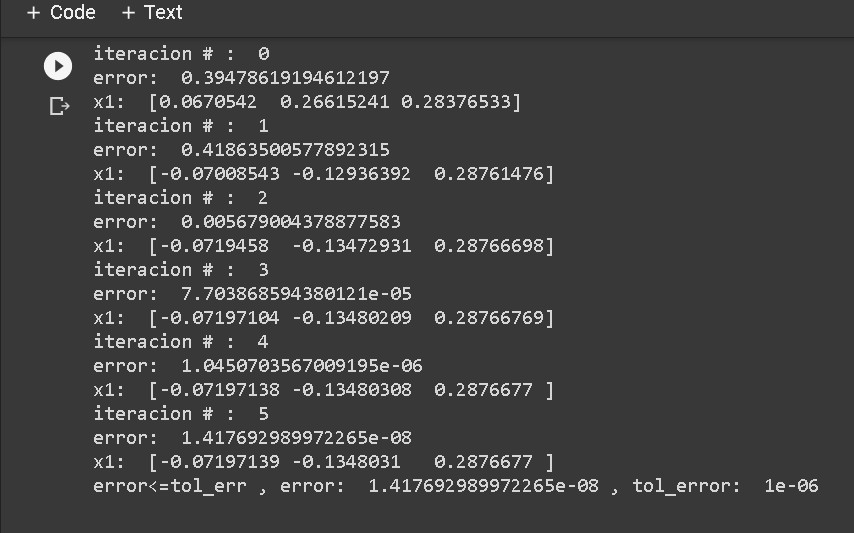

# Grafica

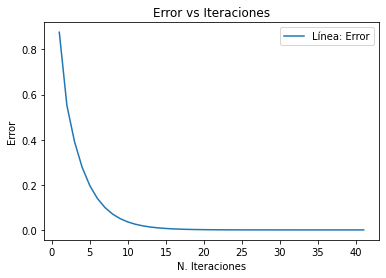

In [ ]:

import matplotlib.pyplot as plt

import numpy as np

x = Num_iter      # matriz de veces que se hizo el met. Jacobi
y = Error         # error en cada intento

plt.plot(x, y, label = 'Línea: Error')

plt.plot()

plt.xlabel('N. Iteraciones')
plt.ylabel('Error' )
plt.title('Error vs Iteraciones')
plt.legend()
plt.show()




## Solucion adecuada:

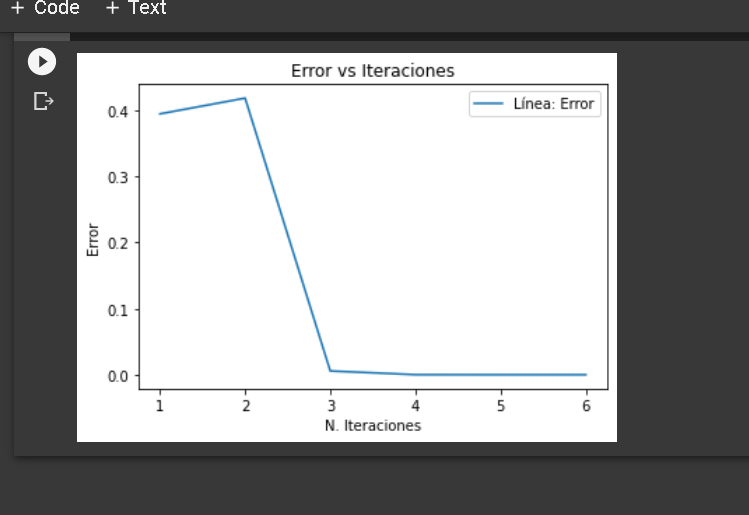


##  Gauss-Seidel   &   SOR

```
# T
```



In [ ]:
def SOR(A_mat, b_vect, x_vect, max_iter, es, alpha):
  longi_x = len(x_vect)
  for i in range(longi_x):
    dummy = A[i][i]
    for j in range(longi_x):
      A[i][j] /= dummy
    b[i] /= dummy
  for i in range(longi_x):
    sum = b[i]
    for j in range(longi_x):
      if i != j:
        sum -= A[i][j] * x[j]
    x[i] = sum

    iter = 1

    while iter <= max_iter or ea > tol_err:
      centinela = 1
      for i in range(longi_x):
        viejo = x[i]
        sum   = b[i]
        for j in range(longi_x):
          if i != j:
            sum -= A[i][j] * x[j]
        x[i] = alpha * sum + (1-alpha) * viejo
        if centinela == 1 and x[i] != 0:
          ea = abs((x[i] - viejo )/x[i]) * 100
          if ea > tolerancia:
            centinela = 0
      print('iter: ', iter)
      print('x: ', x)
      iter += 1
      if centinela == 1 or iter >= max_iter:
        break
  return x




# Paso 2.1

### LLamar a G-S :

In [ ]:
import numpy as np

print('is DD : ', DD)

cantidad_ceros = len(A)

x_ = [ 0 for i in range(cantidad_ceros) ]
max_iteraciones = 600
tolerancia = 0.00001

if DD:
  alphas = random.random()
else:
  alphas = random.random()

#alpha = 1
print('alpha: ', alphas)

SOR(A, b, x_, max_iteraciones, tolerancia, alphas )
print(SOR)

is DD :  False
alpha:  0.32260288199904363
iter:  1
x:  [0.22269632 2.29035284 0.03108354]
iter:  2
x:  [0.22663242 2.26219638 0.01855537]
iter:  3
x:  [0.23175072 2.24233825 0.01113921]
iter:  4
x:  [0.23677438 2.22805562 0.0067368 ]
iter:  5
x:  [0.24118354 2.21762546 0.00412636]
iter:  6
x:  [0.24483146 2.20992257 0.00258924]
iter:  7
x:  [2.47743290e-01 2.20418903e+00 1.69832777e-03]
iter:  8
x:  [2.50012987e-01 2.19989943e+00 1.19720191e-03]
iter:  9
x:  [2.51752717e-01 2.19668044e+00 9.30524105e-04]
iter:  10
x:  [2.53069660e-01 2.19426142e+00 8.03515308e-04]
iter:  11
x:  [2.54056868e-01 2.19244309e+00 7.58097809e-04]
iter:  12
x:  [2.54791003e-01 2.19107714e+00 7.58671762e-04]
iter:  13
x:  [2.55333213e-01 2.19005229e+00 7.83525635e-04]
iter:  14
x:  [2.55731226e-01 2.18928468e+00 8.19582574e-04]
iter:  15
x:  [2.56021727e-01 2.18871092e+00 8.59148881e-04]
iter:  16
x:  [2.56232589e-01 2.18828306e+00 8.97881059e-04]
iter:  17
x:  [2.56384801e-01 2.18796480e+00 9.33504871e-04]
i